PROJETO PRÁTICO FINAL

DECISION TREE CLASSIFIER

por DOUGLAS WELENDORF

In [1]:
# INÍCIO TRATAMENTO DE DADOS

In [2]:
# bibliotecas
import psycopg2 #integração ao PostgreSQL
import pandas as pd #lib de manipulação dos dados
import seaborn as srn #lib de visualização de dados
import statistics as sts #modulo de estatística básica

# decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

In [3]:
#conexão com BD
conn = psycopg2.connect(dbname="proj", user="postgres", password="123456")

#cursor para executar os comandos
cur = conn.cursor()

#limpeza e tratamento da tabela credito
cur.execute("SELECT * FROM credito")

#recuperar todos os registros da consulta
registros = cur.fetchall()

#dados da tabela credito
dataset = pd.DataFrame(registros)

#nomear colunas (SQL)
dataset.columns = ["IDCREDITO", "Duracao", "HistoricoCredito", "Proposito", "Valor", "Investimentos", "Emprego", "TempoParcelamento", "EstadoCivil", "FiadorTerceiros", "ResidenciaDesde", "Idade", "OutrosFinanciamentos", "Habitacao", "EmprestimoExistente", "Profissao", "Dependentes", "SocioEmpresa", "Estrangeiro", "Status"]

#ordem crescente pelo ID
dataset.sort_values(["IDCREDITO"], ascending=True)

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
64,1,6,0,1,1169,1,NaN,4,4,3,4.0,67,3,1.0,2,4,1,1,0,1
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,996,12,2,3,1736,2,4.0,3,1,3,4.0,31,3,1.0,1,3,1,0,0,1
974,997,30,2,5,3857,2,3.0,4,2,3,4.0,40,3,1.0,1,1,1,1,0,1
975,998,12,2,1,804,2,2.0,4,4,3,4.0,38,3,1.0,1,4,1,0,0,1
976,999,45,2,1,1845,2,3.0,4,4,3,4.0,23,3,2.0,1,4,1,1,0,0


In [4]:
#verificar dados duplicados no IDCREDITO
dataset[dataset.duplicated(['IDCREDITO'],keep=False)]

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status


In [5]:
#verificar valores NAN
dataset.isnull().sum()

IDCREDITO                0
Duracao                  0
HistoricoCredito         0
Proposito                0
Valor                    0
Investimentos            0
Emprego                 10
TempoParcelamento        0
EstadoCivil              0
FiadorTerceiros          0
ResidenciaDesde          7
Idade                    0
OutrosFinanciamentos     0
Habitacao                9
EmprestimoExistente      0
Profissao                0
Dependentes              0
SocioEmpresa             0
Estrangeiro              0
Status                   0
dtype: int64

In [6]:
# IDCREDITO = id
# Duracao = numérico
# HistoricoCredito = categórico
# Proposito = categórico
# Valor = numérico
# Investimentos = categórico
# Emprego = categórico
# TempoParcelamento = categórico (desconhecido / sem tabela SQL)
# EstadoCivil = categórico
# FiadorTerceiros = categórico
# ResidenciaDesde = categórico (desconhecido / sem tabela SQL)
# Idade = numérico
# OutrosFinanciamentos = categórico
# Habitacao = categórico
# EmprestimoExistente = categórico (desconhecido / sem tabela SQL)
# Profissao = categórico
# Dependentes = categórico (desconhecido / sem tabela SQL)
# SocioEmpresa = categórico (desconhecido / sem tabela SQL)
# Estrangeiro = categórico (desconhecido / sem tabela SQL)
# Status = categórico (desconhecido / sem tabela SQL)

# SQL tables: clientes, credito, emprego, estadocivil, fiador, habitacao, historico_credito, investimentos, outrosfinanc, profissao, proposito

In [7]:
# dado numérico
dataset['Duracao'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duracao, dtype: float64

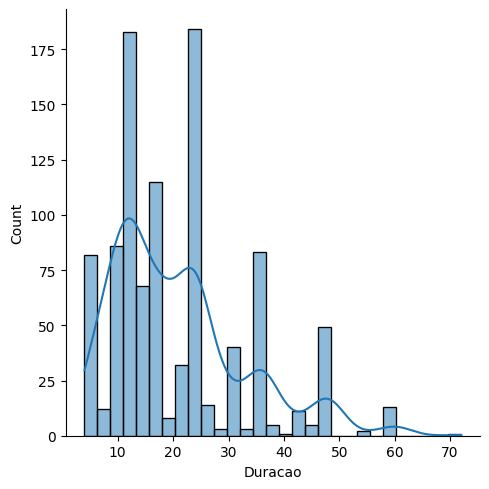

In [8]:
srn.displot(dataset['Duracao'], kde=True)

Text(0.5, 1.0, 'Duracao')

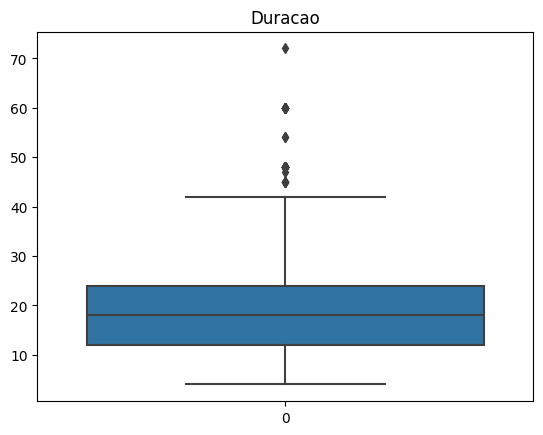

In [9]:
srn.boxplot(dataset['Duracao']).set_title('Duracao')

In [10]:
# dado categórico
dataset.groupby(['HistoricoCredito']).size()

HistoricoCredito
0     11
1    289
2    526
3     86
4     40
5     48
dtype: int64

In [11]:
# consulta SQL table historico_credito
cur.execute("SELECT * FROM historico_credito")
registros = cur.fetchall()
HistoricoCreditoSql = pd.DataFrame(registros)
HistoricoCreditoSql

,0,1
0,1,Critico-outros creditos
1,2,existentes/pagos
2,3,Atrasos anteriores
3,4,sem creditos/todos pagos
4,5,todos pagos


In [12]:
# correção de dados da coluna HistoricoCredito 
dataset.loc[dataset['HistoricoCredito'] ==  0, 'HistoricoCredito'] = 2
dataset.groupby(['HistoricoCredito']).size()

HistoricoCredito
1    289
2    537
3     86
4     40
5     48
dtype: int64

In [13]:
# dado categórico
dataset.groupby(['Proposito']).size()

Proposito
1     280
2      50
3     181
4     234
5     103
6      97
7      12
8      22
9      12
10      9
dtype: int64

In [14]:
# consulta SQL table proposito
cur.execute("SELECT * FROM proposito")
registros = cur.fetchall()
PropositoSql = pd.DataFrame(registros)
PropositoSql

,0,1
0,1,reforma
1,2,educacao
2,3,moveis
3,4,veiculo novo
4,5,veiculo usado
5,6,abrir negocio
6,7,quitar divida
7,8,reforma casa
8,9,outros
9,10,qualificacao


In [15]:
# dado numérico
dataset['Valor'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Valor, dtype: float64

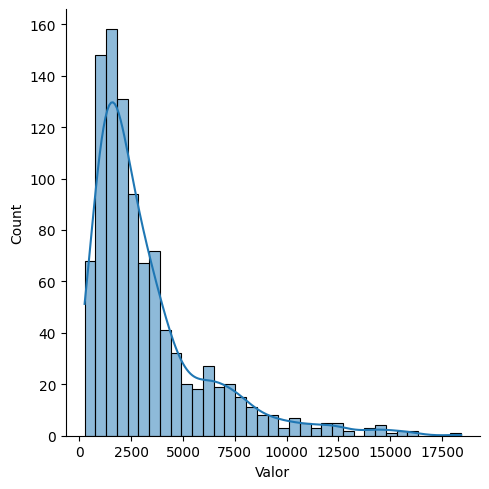

In [16]:
srn.displot(dataset['Valor'], kde=True)

Text(0.5, 1.0, 'Valor')

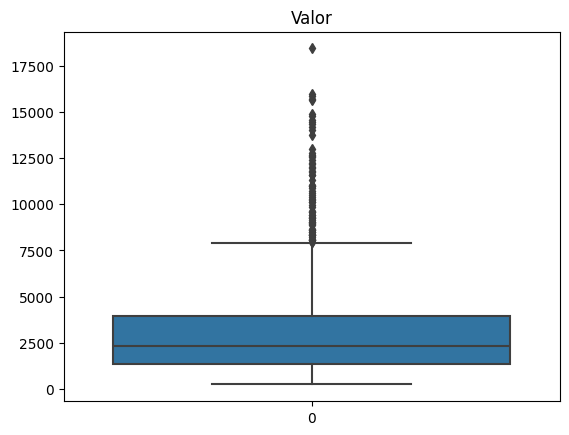

In [17]:
srn.boxplot(dataset['Valor']).set_title('Valor')

In [18]:
# dado categórico
dataset.groupby(['Investimentos']).size()

Investimentos
1    183
2    603
3     63
4     48
5    103
dtype: int64

In [19]:
# consulta SQL table investimentos
cur.execute("SELECT * FROM investimentos")
registros = cur.fetchall()
InvestimentosSql = pd.DataFrame(registros)
InvestimentosSql

,0,1
0,1,Desconhecido\n
1,2,<100\n
2,3,500<=X<1000
3,4,>=1000
4,5,100<=X<500


In [20]:
# dado categórico
dataset.groupby(['Emprego']).size()

Emprego
1.0    171
2.0    247
3.0    338
4.0    172
5.0     62
dtype: int64

In [21]:
# consulta SQL table emprego
cur.execute("SELECT * FROM emprego")
registros = cur.fetchall()
EmpregoSql = pd.DataFrame(registros)
EmpregoSql

,0,1
0,1,<1
1,2,>=7
2,3,1<=X<4
3,4,4<=X<7
4,5,Desempregado


In [22]:
# total de NAs em Emprego
dataset['Emprego'].isnull().sum()

10

In [23]:
# preencher NAs com a moda do Emprego (3) e verifica alteração
dataset['Emprego'].fillna(3, inplace=True)
dataset['Emprego'].isnull().sum()

0

In [24]:
# verificação
dataset.groupby(['Emprego']).size()

Emprego
1.0    171
2.0    247
3.0    348
4.0    172
5.0     62
dtype: int64

In [25]:
# dado categórico (desconhecido / sem tabela SQL)
dataset.groupby(['TempoParcelamento']).size()

TempoParcelamento
1    136
2    231
3    157
4    476
dtype: int64

In [26]:
# dado categórico
dataset.groupby(['EstadoCivil']).size()

EstadoCivil
1    310
2     50
3     92
4    548
dtype: int64

In [27]:
# consulta SQL table estadocivil
cur.execute("SELECT * FROM estadocivil")
registros = cur.fetchall()
EstadoCivilSql = pd.DataFrame(registros)
EstadoCivilSql

,0,1
0,1,feminino div/dep/cas
1,2,maculino div/dep
2,3,masculino cas/viu
3,4,masculino solteiro


In [28]:
# dado categórico
dataset.groupby(['FiadorTerceiros']).size()

FiadorTerceiros
1      1
2     39
3    908
4     52
dtype: int64

In [29]:
# consulta SQL table fiador
cur.execute("SELECT * FROM fiador")
registros = cur.fetchall()
FiadorTerceirosSql = pd.DataFrame(registros)
FiadorTerceirosSql

,0,1
0,1,co aplicante
1,2,co requerente
2,3,nao
3,4,sim


In [30]:
# dado categórico (desconhecido / sem tabela SQL)
dataset.groupby(['ResidenciaDesde']).size()

ResidenciaDesde
1.0    129
2.0    308
3.0    147
4.0    409
dtype: int64

In [31]:
# total de NAs em ResidenciaDesde
dataset['ResidenciaDesde'].isnull().sum()

7

In [32]:
# preencher NAs com a moda do ResidenciaDesde (4) e verifica alteração
dataset['ResidenciaDesde'].fillna(4, inplace=True)
dataset['ResidenciaDesde'].isnull().sum()

0

In [33]:
# verificação
dataset.groupby(['ResidenciaDesde']).size()

ResidenciaDesde
1.0    129
2.0    308
3.0    147
4.0    416
dtype: int64

In [34]:
# dado numérico
dataset['Idade'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Idade, dtype: float64

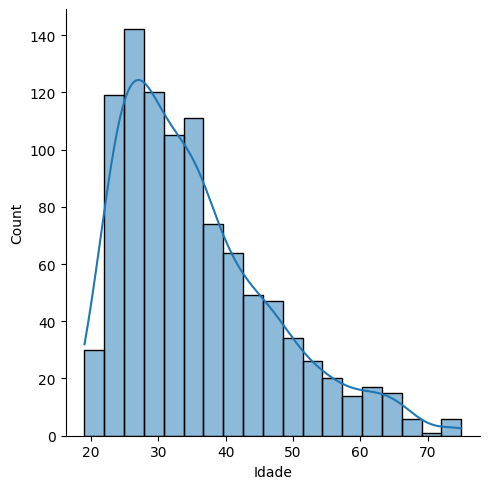

In [35]:
srn.displot(dataset['Idade'], kde=True)

Text(0.5, 1.0, 'Idade')

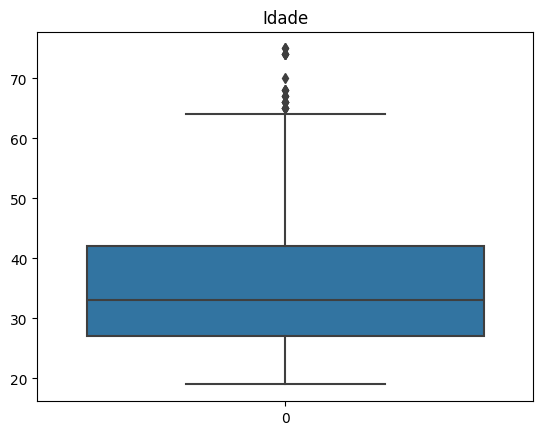

In [36]:
srn.boxplot(dataset['Idade']).set_title('Idade')

In [37]:
# dado categórico
dataset.groupby(['OutrosFinanciamentos']).size()

OutrosFinanciamentos
1    139
2     47
3    814
dtype: int64

In [38]:
# consulta SQL table outrosfinanc
cur.execute("SELECT * FROM outrosfinanc")
registros = cur.fetchall()
OutrosFinanciamentosSql = pd.DataFrame(registros)
OutrosFinanciamentosSql

,0,1
0,1,banco
1,2,loja
2,3,nenhum


In [39]:
# dado categórico
dataset.groupby(['Habitacao']).size()

Habitacao
1.0    709
2.0    107
3.0    175
dtype: int64

In [40]:
# consulta SQL table habitacao
cur.execute("SELECT * FROM habitacao")
registros = cur.fetchall()
HabitacaoSql = pd.DataFrame(registros)
HabitacaoSql

,0,1
0,1,proria
1,2,de graca
2,3,alugada


In [41]:
# total de NAs em Habitacao
dataset['Habitacao'].isnull().sum()

9

In [42]:
# preencher NAs com a moda do Habitacao (1) e verifica alteração
dataset['Habitacao'].fillna(1, inplace=True)
dataset['Habitacao'].isnull().sum()

0

In [43]:
# verificação
dataset.groupby(['Habitacao']).size()

Habitacao
1.0    718
2.0    107
3.0    175
dtype: int64

In [44]:
# dado categórico (desconhecido / sem tabela SQL)
dataset.groupby(['EmprestimoExistente']).size()

EmprestimoExistente
1    633
2    333
3     28
4      6
dtype: int64

In [45]:
# dado categórico
dataset.groupby(['Profissao']).size()

Profissao
1      147
2       22
3      197
4      625
999      9
dtype: int64

In [46]:
# consulta SQL table profissao
cur.execute("SELECT * FROM profissao")
registros = cur.fetchall()
ProfissaoSql = pd.DataFrame(registros)
ProfissaoSql

,0,1
0,1,altamente qualificado/empresario
1,2,desempregado
2,3,nao qualificado
3,4,qualificado


In [47]:
# correção de dados da coluna Profissao 
dataset.loc[dataset['Profissao'] ==  999, 'Profissao'] = 4
dataset.groupby(['Profissao']).size()

Profissao
1    147
2     22
3    197
4    634
dtype: int64

In [48]:
# dado categórico (desconhecido / sem tabela SQL)
dataset.groupby(['Dependentes']).size()

Dependentes
1    845
2    155
dtype: int64

In [49]:
# dado categórico (desconhecido / sem tabela SQL)
dataset.groupby(['SocioEmpresa']).size()

SocioEmpresa
0    596
1    404
dtype: int64

In [50]:
# dado categórico (desconhecido / sem tabela SQL)
dataset.groupby(['Estrangeiro']).size()

Estrangeiro
0    963
1     37
dtype: int64

In [51]:
# dado categórico (desconhecido / sem tabela SQL)
dataset.groupby(['Status']).size()

Status
0    300
1    700
dtype: int64

In [52]:
#verificar valores NAN
dataset.isnull().sum()

IDCREDITO               0
Duracao                 0
HistoricoCredito        0
Proposito               0
Valor                   0
Investimentos           0
Emprego                 0
TempoParcelamento       0
EstadoCivil             0
FiadorTerceiros         0
ResidenciaDesde         0
Idade                   0
OutrosFinanciamentos    0
Habitacao               0
EmprestimoExistente     0
Profissao               0
Dependentes             0
SocioEmpresa            0
Estrangeiro             0
Status                  0
dtype: int64

In [53]:
# fechar a conexão com o banco de dados
conn.close()

In [54]:
# FIM TRATAMENTO DE DADOS

In [55]:
# INÍCIO DECISION TREE CLASSIFIER

In [56]:
# formato de matriz

# os previsores são todas as informações que utilizaremos no métoda de árvores de decisão para definir o status
previsores = dataset.iloc[:,1:19].values

# o status é o que estamos querendo classificar (adimplente ou inadimplente)
status = dataset.iloc[:,19].values

previsores
#status

array([[48.,  2.,  1., ...,  1.,  0.,  0.],
       [12.,  1.,  2., ...,  2.,  0.,  0.],
       [42.,  2.,  3., ...,  2.,  0.,  0.],
       ...,
       [18.,  2.,  1., ...,  1.,  0.,  0.],
       [ 6.,  2., 10., ...,  2.,  1.,  0.],
       [24.,  2.,  6., ...,  1.,  1.,  0.]])

In [57]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
#X: Matriz de características (ou seja, os atributos/variáveis independentes).
#y: Vetor de rótulos (ou seja, as classes/targets que você está tentando prever).
#test_size: A proporção do conjunto de teste em relação ao conjunto total. Geralmente é especificado como um valor entre 0 e 1. Por exemplo, test_size=0.2 indica que 20% dos dados serão usados como conjunto de teste.
#random_state: O valor do semente (seed) aleatório. Isso garante que a divisão dos dados seja reproducível.

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  status,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

array([[12.,  2.,  4., ...,  1.,  1.,  0.],
       [24.,  2.,  5., ...,  1.,  1.,  0.],
       [12.,  2.,  1., ...,  1.,  1.,  0.],
       ...,
       [ 6.,  5.,  4., ...,  2.,  0.,  0.],
       [15.,  1.,  5., ...,  1.,  1.,  0.],
       [24.,  2.,  1., ...,  1.,  0.,  0.]])

In [58]:
# Criação e treinamento do modelo
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [59]:
# Exportação da árvore de decisão para o formato .dot, para posterior visualização
export_graphviz(arvore, out_file = 'treeProjetoFinal.dot')

In [60]:
# Obtenção das previsões
previsoes = arvore.predict(X_teste)
previsoes

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], d

In [61]:
#matriz de confusão
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 32,  43],
       [ 59, 166]], dtype=int64)

In [62]:
#taxa acerto
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.66

In [63]:
#taxa erro
taxa_erro = 1 - taxa_acerto
taxa_erro

0.33999999999999997

In [64]:
# FIM DECISION TREE CLASSIFIER